# KI Projekt Verkehrsszenario _ Verhaltensprädiktion

### Importieren der benötigten Bibliotheken

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

### Importieren des Datensatzes

In [175]:
df_train = pd.read_csv("SIM_002.csv", delimiter=";")
df_train.dtypes


v                    object
v_left               object
v_front              object
d_left                int64
d_front               int64
type_left            object
type_front           object
radius_curve(m)       int64
slope_street         object
street_type          object
time                 object
weather              object
type_vehicle         object
speed_limit(km/h)     int64
action               object
dtype: object

### Konvertieren der Objekt-Zahlenwerte zu Float Zahlenwerten
Nachdem auffällt, dass v, v_left und v_front als object eingelesen werden, müssen diese Spalten hier noch konvertiert werden.

In [176]:
df_train = df_train.replace(',','.', regex=True)
df_train['v'] = pd.to_numeric(df_train['v'])
df_train['v_left'] = pd.to_numeric(df_train['v_left'])
df_train['v_front'] = pd.to_numeric(df_train['v_front'])

df_train

,v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve(m),slope_street,street_type,time,weather,type_vehicle,speed_limit(km/h),action
0,38.0,40.0,31.0,-155,68,car,car,4761,flat,autobahn,night,dry,car,250,lane_change
1,23.5,23.5,22.0,-147,40,car,truck,1556,flat,autobahn,day,dry,truck,250,continue
2,24.5,36.5,22.0,-28,48,car,truck,3488,flat,country_road (separated),dusk,rain,motorcycle,100,continue
3,33.0,36.0,31.0,-26,59,truck,motorcycle,5576,flat,country_road (separated),dawn,rain,car,120,continue
4,28.0,41.0,22.0,-141,52,motorcycle,truck,2340,flat,country_road (separated),night,dry,motorcycle,120,lane_change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,36.0,40.0,31.5,-179,65,motorcycle,car,1600,flat,autobahn,day,dry,car,250,continue
497,25.5,32.5,19.5,-109,42,car,truck,1973,ascending,country_road (separated),night,dry,car,120,decelerate
498,36.5,36.0,31.0,-38,47,car,motorcycle,3029,flat,autobahn,day,dry,car,80,continue
499,32.0,35.0,29.5,-12,54,car,car,2605,flat,autobahn,day,dry,motorcycle,250,continue


### Bereinigen des Datensets wo notwendig

In [177]:
df_train = df_train.loc[df_train["v"] != 0]
df_train

,v,v_left,v_front,d_left,d_front,type_left,type_front,radius_curve(m),slope_street,street_type,time,weather,type_vehicle,speed_limit(km/h),action
0,38.0,40.0,31.0,-155,68,car,car,4761,flat,autobahn,night,dry,car,250,lane_change
1,23.5,23.5,22.0,-147,40,car,truck,1556,flat,autobahn,day,dry,truck,250,continue
2,24.5,36.5,22.0,-28,48,car,truck,3488,flat,country_road (separated),dusk,rain,motorcycle,100,continue
3,33.0,36.0,31.0,-26,59,truck,motorcycle,5576,flat,country_road (separated),dawn,rain,car,120,continue
4,28.0,41.0,22.0,-141,52,motorcycle,truck,2340,flat,country_road (separated),night,dry,motorcycle,120,lane_change
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,36.0,40.0,31.5,-179,65,motorcycle,car,1600,flat,autobahn,day,dry,car,250,continue
497,25.5,32.5,19.5,-109,42,car,truck,1973,ascending,country_road (separated),night,dry,car,120,decelerate
498,36.5,36.0,31.0,-38,47,car,motorcycle,3029,flat,autobahn,day,dry,car,80,continue
499,32.0,35.0,29.5,-12,54,car,car,2605,flat,autobahn,day,dry,motorcycle,250,continue


### Encoding der nicht-nummerischen Werte
Die folgenden features sind vom typ object und benötigen deshalb ein label encoding, damit später besser mit ihnen gearbeitet werden kann.
Das label encoding wird mit der Bibliothek scikit learn durchgeführt.
#### type-left:
* car -> 0
* motorcycle -> 1
* sportscar -> 2
* truck -> 3


In [178]:

print(df_train['type_left'].value_counts())

# Do the label encoding with sklearn
type_left_encoder = preprocessing.LabelEncoder().fit(df_train["type_left"])
print(dict(zip(type_left_encoder.classes_, type_left_encoder.transform(type_left_encoder.classes_))))
df_train["type_left"] = type_left_encoder.transform(df_train["type_left"])

car           323
truck         107
sportscar      36
motorcycle     35
Name: type_left, dtype: int64
{'car': 0, 'motorcycle': 1, 'sportscar': 2, 'truck': 3}


#### type-front:
* car -> 0
* motorcycle -> 1
* sportscar -> 2
* truck -> 3

In [179]:
print(df_train['type_front'].value_counts())

# Do the label encoding with sklearn
type_front_encoder = preprocessing.LabelEncoder().fit(df_train["type_front"])
print(dict(zip(type_front_encoder.classes_, type_front_encoder.transform(type_front_encoder.classes_))))
df_train["type_front"] = type_front_encoder.transform(df_train["type_front"])

truck         253
car           207
motorcycle     22
sportscar      19
Name: type_front, dtype: int64
{'car': 0, 'motorcycle': 1, 'sportscar': 2, 'truck': 3}


#### slope_street:
* ascending -> 0
* decending -> 1
* flat -> 2

In [180]:
print(df_train['slope_street'].value_counts())

# Do the label encoding with sklearn
slope_street_encoder = preprocessing.LabelEncoder().fit(df_train["slope_street"])
print(dict(zip(slope_street_encoder.classes_, slope_street_encoder.transform(slope_street_encoder.classes_))))
df_train["slope_street"] = slope_street_encoder.transform(df_train["slope_street"])

flat         324
ascending     99
decending     78
Name: slope_street, dtype: int64
{'ascending': 0, 'decending': 1, 'flat': 2}


#### street_type:
* autobahn -> 0
* country_road (separated) -> 1

In [181]:
print(df_train['street_type'].value_counts())

# Do the label encoding with sklearn
street_type_encoder = preprocessing.LabelEncoder().fit(df_train["street_type"])
print(dict(zip(street_type_encoder.classes_, street_type_encoder.transform(street_type_encoder.classes_))))
df_train["street_type"] = street_type_encoder.transform(df_train["street_type"])

country_road (separated)    353
autobahn                    148
Name: street_type, dtype: int64
{'autobahn': 0, 'country_road (separated)': 1}


#### time:
* dawn -> 0
* day -> 1
* dusk -> 2
* night -> 3

In [182]:
print(df_train['time'].value_counts())

# Do the label encoding with sklearn
time_encoder = preprocessing.LabelEncoder().fit(df_train["time"])
print(dict(zip(time_encoder.classes_, time_encoder.transform(time_encoder.classes_))))
df_train["time"] = time_encoder.transform(df_train["time"])

day      274
night    128
dawn      51
dusk      48
Name: time, dtype: int64
{'dawn': 0, 'day': 1, 'dusk': 2, 'night': 3}


#### weather:
* dry -> 0
* fog -> 1
* rain -> 2
* snow_ice -> 3

In [183]:
print(df_train['weather'].value_counts())

# Do the label encoding with sklearn
weather_encoder = preprocessing.LabelEncoder().fit(df_train["weather"])
print(dict(zip(weather_encoder.classes_, weather_encoder.transform(weather_encoder.classes_))))
df_train["weather"] = weather_encoder.transform(df_train["weather"])

dry         416
rain         74
fog          10
snow_ice      1
Name: weather, dtype: int64
{'dry': 0, 'fog': 1, 'rain': 2, 'snow_ice': 3}


#### type_vehicle:
* car -> 0
* motorcycle -> 1
* sportscar -> 2
* truck -> 3

In [184]:
print(df_train['type_vehicle'].value_counts())

# Do the label encoding with sklearn
type_vehicle_encoder = preprocessing.LabelEncoder().fit(df_train["type_vehicle"])
print(dict(zip(type_vehicle_encoder.classes_, type_vehicle_encoder.transform(type_vehicle_encoder.classes_))))
df_train["type_vehicle"] = type_vehicle_encoder.transform(df_train["type_vehicle"])

car           312
truck         125
sportscar      34
motorcycle     30
Name: type_vehicle, dtype: int64
{'car': 0, 'motorcycle': 1, 'sportscar': 2, 'truck': 3}


#### action:
* accelerated_lane_change -> 0
* continue -> 1
* decelerate -> 2
* lane_change -> 3

In [185]:
print(df_train['action'].value_counts())

# Do the label encoding with sklearn
action_encoder = preprocessing.LabelEncoder().fit(df_train["action"])
print(dict(zip(action_encoder.classes_, action_encoder.transform(action_encoder.classes_))))
df_train["action"] = action_encoder.transform(df_train["action"])

continue                   372
lane_change                 55
decelerate                  55
accelerated_lane_change     19
Name: action, dtype: int64
{'accelerated_lane_change': 0, 'continue': 1, 'decelerate': 2, 'lane_change': 3}


Text(0.5, 1.0, 'Korrelation Heatmap aller Attribute')

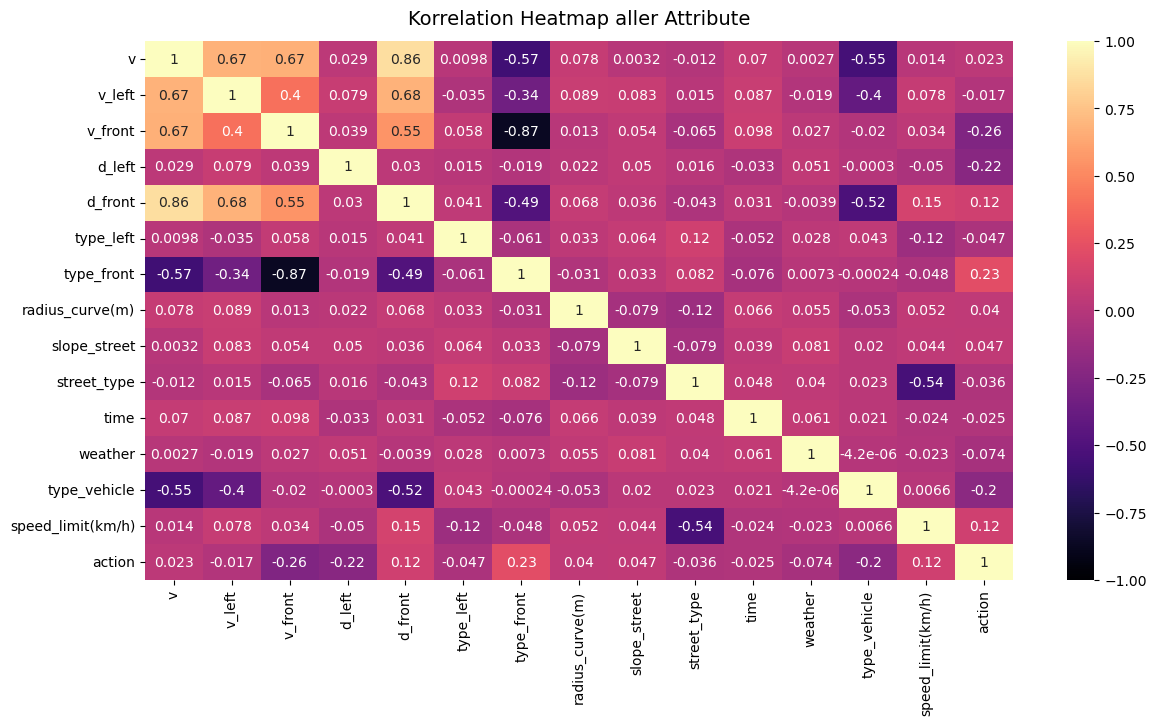

In [186]:
plt.figure(figsize=(14, 7))
sns.heatmap(data=df_train.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap="magma").set_title('Korrelation Heatmap aller Attribute', fontdict={'fontsize': 14}, pad=12)

### Evaluation der Korrelationsheatmap
Da die Geschwindigkeit ein zentraler Faktor in der Überholungs-Überlegung ist, wird diese zuerst betrachtet. Sie korreliert in der Heatmap sehr stark mit v_left, v_front und d_front. Außerdem ist auffällig, dass eine negative Korrelation mit type_front und type_vehicle besteht. Diese kann aber wegen nicht vorhandener Rangordnung in den Attributen allerdings nicht in Betracht gezogen werden. 

type_front korreliert zwar mit v, v_left, v_front und d_front negativ, allerdings ist auch hier keine Nominalskala vorhanden.

Der wichtigste Faktor für 

TODO: 
Deltas ausrechnen
Action Korrelationen einzeln betrachten

